## Using the distance matricies I created in [the distance API notebook](http://localhost:8888/notebooks/Desktop/CapstoneMSGT/Notebooks/TestinBingAPI.ipynb) to try MDS.

[]

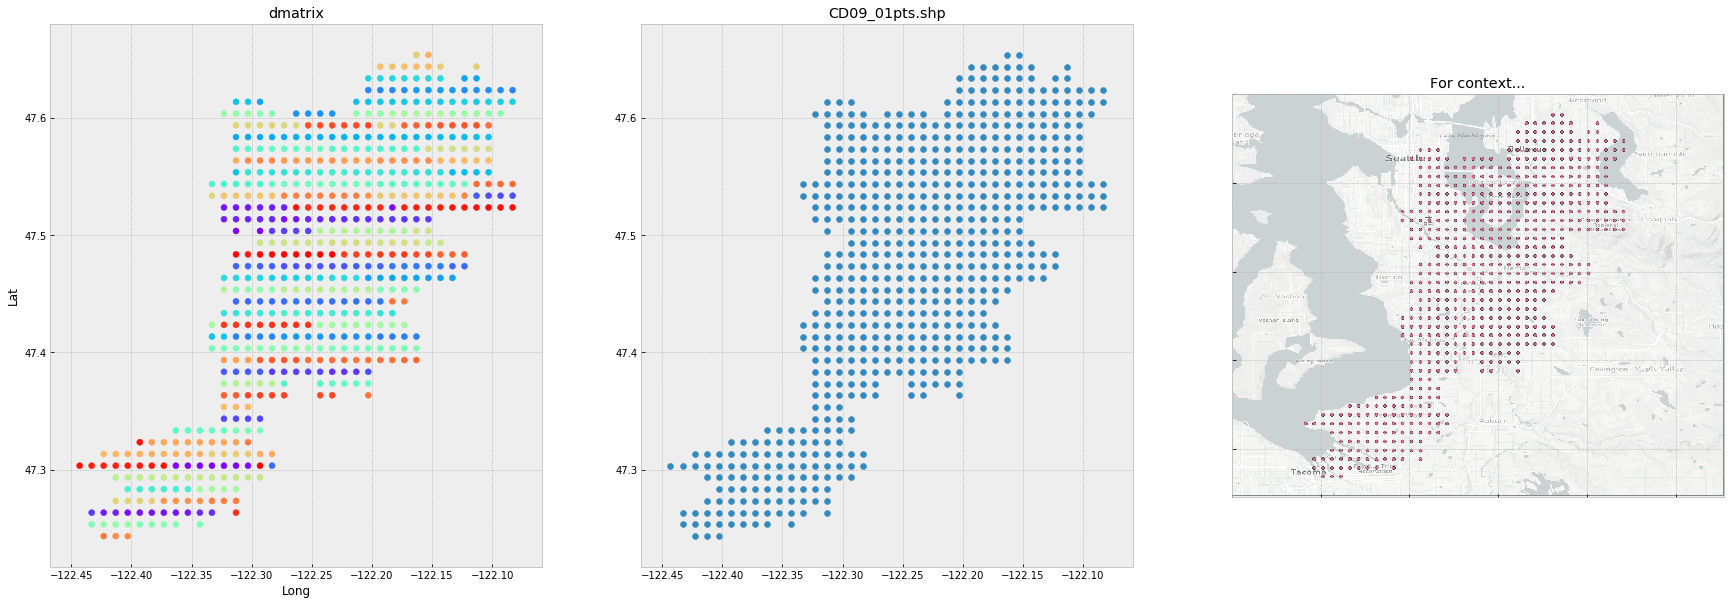

In [73]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

#queue up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/09/CD09_01dmx.pkl')
dmatrix.fillna(0)

#create a list of points from the df header to plot
geopoints = list(dmatrix)

#plot the points from the dmatrix headings
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
#compare to the shapefile (can never be too careful...)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))
ax1.scatter(lat,long, c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

pts = 'Shapes/09/CD09_01pts.shp'
CD_grid = gpd.read_file(pts)
CD_grid.plot(ax=ax2)
ax2.set_title('CD09_01pts.shp')

img = plt.imread('Shapes/09/CD09_01.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])



In [85]:
from sklearn import manifold
import numpy as np
from sklearn.metrics import pairwise_distances

#need to remove a NaN at the intersection of the final row/column
dmatrix.fillna(0, inplace = True)  # ttm = travel time matrix
dmatrix.replace('Decimal('NaN')', 0)



dmatrix.get_loc(np.nan)
#taking a look to see if anything else changed since we saved the distance matrix in the Bing API notebook:



SyntaxError: invalid syntax (<ipython-input-85-fb3e9eb48bc6>, line 7)

In [71]:
# pass the travel time matrix to a pairwise_distance function per https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
D = pairwise_distances(dmatrix)

# pass the pairwise_distance array back to pandas dataframe for a better visualization.
edm = pd.DataFrame(D)  #edm = euclidean distance matrix
edm
#The main problem here is that I have no idea how it is arriving at these pairwise distance values. The point geometry is stored as a tuple in the dataframe index and header (firts row/column).
#However, after passing the distance matrix to the pairwise_distances function, the header and index are re-assigned intiger values. To complicate matters, the unique combination function 
#I perfomred in the Bing API function to create this matrix randomized the points. To see this illustrated, look at the colors in the left plot above. They should show a smooth color ramp,
#but you can see they jump around a bit.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

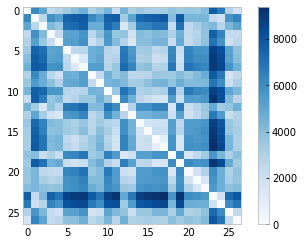

In [61]:
#visualizing the pairwise_distance array:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();


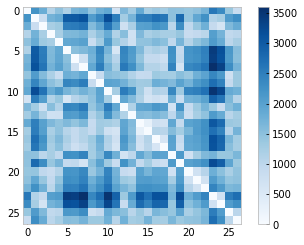

In [62]:

#visualizing the precomputed travel time matrix array:
plt.imshow(ttm, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();


In [63]:
ttm2 = ttm #make a copy so I don't accidentally break stuff.

model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(ttm2)
#plt.scatter(out[:, 0], out[:, 1], c=colors)
#plt.axis('equal');

#this method is giving me something similar, only rotated 90 degrees counterclockwise (even the point colors correlate)

'getting somewhere.\nif you use a lot of imagination, you can see the colors are in roughly similar places (the line of yellows is now tilted downward at an angle, but corresponds to the four points over Kent!!!!\nInteresting hollow space around S. Lake Washington--the center-right red dot (Mercer Island) is much farther from the other red in the MDS plot. \nThe blue dot from the tideflats also jumps much closer to the blue dot in Fife instead of the red dot over Browns Point. Approaching meaningful analysis here!!'

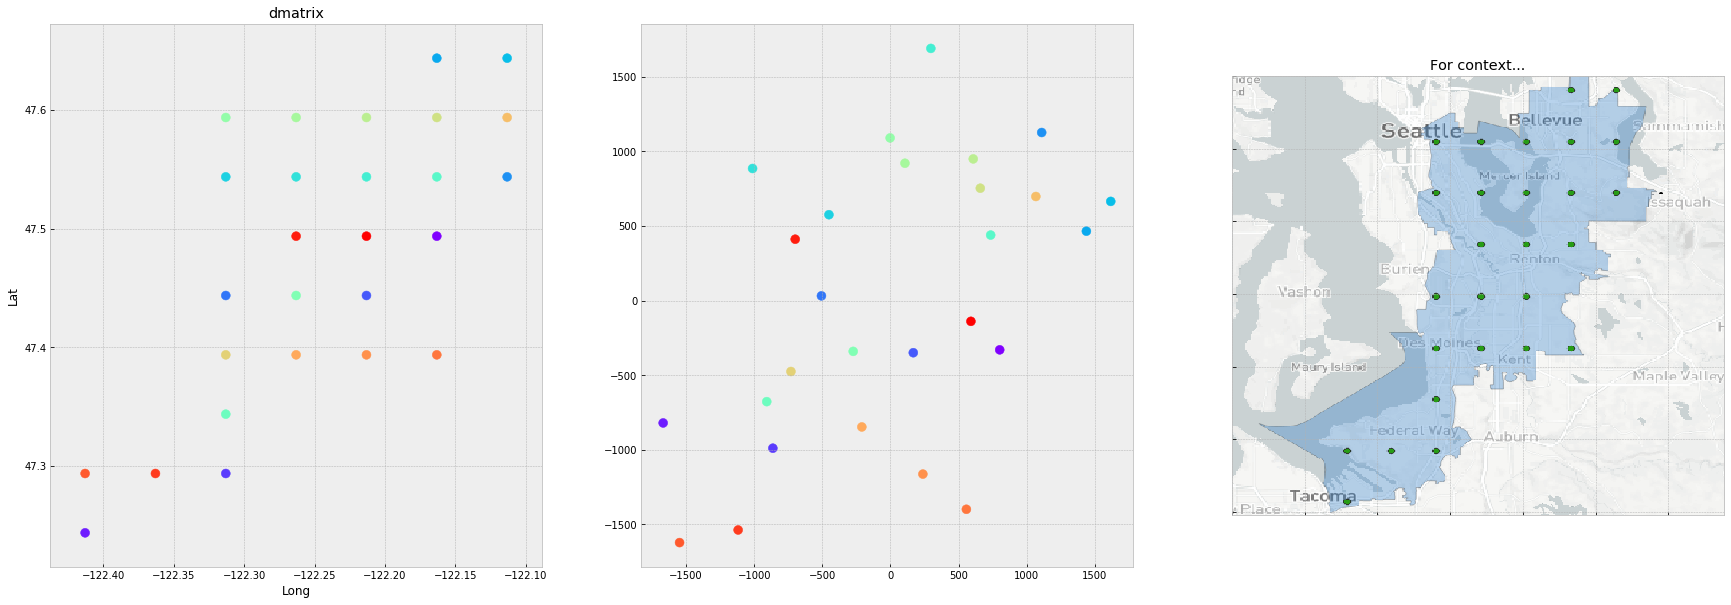

In [64]:
#lets compare the MDS results to our original
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))
ax1.scatter(lat,long, s = 80,  c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

ax2.scatter(out[:, 0], -out[:, 1],s = 80, c = colors)  #needed to add a '-' to invert the y value (I think because the longitude was originally negative ??) 

img = plt.imread('Shapes/09/cd09.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])

'''getting somewhere.
if you use a lot of imagination, you can see the colors are in roughly similar places (the line of yellows is now tilted downward at an angle, but corresponds to the four points over Kent!!!!
Interesting hollow space around S. Lake Washington--the center-right red dot (Mercer Island) is much farther from the other red in the MDS plot. 
The blue dot from the tideflats also jumps much closer to the blue dot in Fife instead of the red dot over Browns Point. Approaching meaningful analysis here!!'''

(47.50354099999961, -122.31306799999875)     False
(47.50354099999961, -122.29306799999874)     False
(47.30354099999965, -122.36306799999878)     False
(47.30354099999965, -122.35306799999877)     False
(47.30354099999965, -122.34306799999877)     False
(47.30354099999965, -122.33306799999876)     False
(47.30354099999965, -122.32306799999876)     False
(47.30354099999965, -122.31306799999875)     False
(47.30354099999965, -122.30306799999875)     False
(47.523540999999604, -122.18306799999868)    False
(47.263540999999655, -122.4030679999988)     False
(47.263540999999655, -122.39306799999879)    False
(47.263540999999655, -122.38306799999879)    False
(47.263540999999655, -122.37306799999878)    False
(47.513540999999606, -122.27306799999873)    False
(47.263540999999655, -122.36306799999878)    False
(47.513540999999606, -122.26306799999873)    False
(47.263540999999655, -122.35306799999877)    False
(47.523540999999604, -122.32306799999876)    False
(47.523540999999604, -122.31306

In [79]:
pd.isna(dmatrix)

(47.50354099999961, -122.31306799999875)  \
(47.50354099999961, -122.31306799999875)                                      False   
(47.50354099999961, -122.29306799999874)                                      False   
(47.30354099999965, -122.36306799999878)                                      False   
(47.30354099999965, -122.35306799999877)                                      False   
(47.30354099999965, -122.34306799999877)                                      False   
(47.30354099999965, -122.33306799999876)                                      False   
(47.30354099999965, -122.32306799999876)                                      False   
(47.30354099999965, -122.31306799999875)                                      False   
(47.30354099999965, -122.30306799999875)                                      False   
(47.523540999999604, -122.18306799999868)                                     False   
(47.263540999999655, -122.4030679999988)                                      False   
(47.263540999999655, -122.39306799999879)                                     False   
(47.263540999999655, -122.38306799999879)                                     False   
(47.263540999999655, -122.37306799999878)                                     False   
(47.513540999999606, -122.27306799999873)                                     False   
(47.263540999999655, -122.36306799999878)                                     False   
(47.513540999999606, -122.26306799999873)                                     False   
(47.263540999999655, -122.35306799999877)                                     False   
(47.523540999999604, -122.32306799999876)                                     False   
(47.523540999999604, -122.31306799999875)                                     False   
(47.523540999999604, -122.30306799999875)                                     False   
(47.523540999999604, -122.29306799999874)                                     False   
(47.523540999999604, -122.28306799999874)                                     False   
(47.523540999999604, -122.27306799999873)                                     False   
(47.263540999999655, -122.4230679999988)                                      False   
(47.513540999999606, -122.32306799999876)                                     False   
(47.263540999999655, -122.4130679999988)                                      False   
(47.513540999999606, -122.31306799999875)                                     False   
(47.513540999999606, -122.30306799999875)                                     False   
(47.513540999999606, -122.29306799999874)                                     False   
(47.513540999999606, -122.28306799999874)                                     False   
(47.513540999999606, -122.25306799999872)                                     False   
(47.513540999999606, -122.24306799999871)                                     False   
(47.513540999999606, -122.23306799999871)                                     False   
(47.263540999999655, -122.34306799999877)                                     False   
(47.513540999999606, -122.2230679999987)                                      False   
(47.263540999999655, -122.33306799999876)                                     False   
(47.513540999999606, -122.2130679999987)                                      False   
(47.38354099999963, -122.23306799999871)                                      False   
(47.513540999999606, -122.2030679999987)                                      False   
(47.38354099999963, -122.2230679999987)                                       False   
(47.513540999999606, -122.19306799999869)                                     False   
(47.38354099999963, -122.2130679999987)                                       False   
(47.513540999999606, -122.18306799999868)                                     False   
(47.513540999999606, -122.17306799999868)                                     False   
(47.513540999999606, -122.16306799999867)

In [87]:
NaN = dmatrix.iloc[627][324]

In [88]:
print(NaN)

NaN


In [89]:
dmatrix.replace(NaN, 0)

(47.50354099999961, -122.31306799999875)  \
(47.50354099999961, -122.31306799999875)                                          0   
(47.50354099999961, -122.29306799999874)                                        540   
(47.30354099999965, -122.36306799999878)                                       2452   
(47.30354099999965, -122.35306799999877)                                       2532   
(47.30354099999965, -122.34306799999877)                                       2346   
(47.30354099999965, -122.33306799999876)                                       2236   
(47.30354099999965, -122.32306799999876)                                       2265   
(47.30354099999965, -122.31306799999875)                                       2079   
(47.30354099999965, -122.30306799999875)                                       2217   
(47.523540999999604, -122.18306799999868)                                      2015   
(47.263540999999655, -122.4030679999988)                                       2709   
(47.263540999999655, -122.39306799999879)                                      2832   
(47.263540999999655, -122.38306799999879)                                      2881   
(47.263540999999655, -122.37306799999878)                                      2573   
(47.513540999999606, -122.27306799999873)                                       920   
(47.263540999999655, -122.36306799999878)                                      2516   
(47.513540999999606, -122.26306799999873)                                      1003   
(47.263540999999655, -122.35306799999877)                                      2598   
(47.523540999999604, -122.32306799999876)                                       532   
(47.523540999999604, -122.31306799999875)                                       410   
(47.523540999999604, -122.30306799999875)                                       651   
(47.523540999999604, -122.29306799999874)                                       749   
(47.523540999999604, -122.28306799999874)                                      1068   
(47.523540999999604, -122.27306799999873)                                       943   
(47.263540999999655, -122.4230679999988)                                       2774   
(47.513540999999606, -122.32306799999876)                                       491   
(47.263540999999655, -122.4130679999988)                                       2724   
(47.513540999999606, -122.31306799999875)                                       371   
(47.513540999999606, -122.30306799999875)                                       886   
(47.513540999999606, -122.29306799999874)                                       697   
(47.513540999999606, -122.28306799999874)                                       832   
(47.513540999999606, -122.25306799999872)                                      1309   
(47.513540999999606, -122.24306799999871)                                      1253   
(47.513540999999606, -122.23306799999871)                                      1302   
(47.263540999999655, -122.34306799999877)                                      2741   
(47.513540999999606, -122.2230679999987)                                       1349   
(47.263540999999655, -122.33306799999876)                                      2400   
(47.513540999999606, -122.2130679999987)                                       1932   
(47.38354099999963, -122.23306799999871)                                       1501   
(47.513540999999606, -122.2030679999987)                                       1923   
(47.38354099999963, -122.2230679999987)                                        1512   
(47.513540999999606, -122.19306799999869)                                      1825   
(47.38354099999963, -122.2130679999987)                                        1636   
(47.513540999999606, -122.18306799999868)                                      1862   
(47.513540999999606, -122.17306799999868)                                      2265   
(47.513540999999606, -122.16306799999867)

In [93]:
dmatrix.iloc[627][324].dtypes


AttributeError: 'decimal.Decimal' object has no attribute 'dtypes'

In [95]:
types = dmatrix.dtypes
types


(47.50354099999961, -122.31306799999875)      int64
(47.50354099999961, -122.29306799999874)      int64
(47.30354099999965, -122.36306799999878)      int64
(47.30354099999965, -122.35306799999877)      int64
(47.30354099999965, -122.34306799999877)      int64
(47.30354099999965, -122.33306799999876)      int64
(47.30354099999965, -122.32306799999876)      int64
(47.30354099999965, -122.31306799999875)      int64
(47.30354099999965, -122.30306799999875)      int64
(47.523540999999604, -122.18306799999868)     int64
(47.263540999999655, -122.4030679999988)      int64
(47.263540999999655, -122.39306799999879)     int64
(47.263540999999655, -122.38306799999879)     int64
(47.263540999999655, -122.37306799999878)    object
(47.513540999999606, -122.27306799999873)     int64
(47.263540999999655, -122.36306799999878)     int64
(47.513540999999606, -122.26306799999873)     int64
(47.263540999999655, -122.35306799999877)     int64
(47.523540999999604, -122.32306799999876)    object
(47.52354099

In [105]:
type(dmatrix.iloc[627][324])

decimal.Decimal

In [113]:
dmatrix = dmatrix.astype('int64', errors="ignore")

In [114]:
dmatrix.iloc[627][324]

Decimal('NaN')

In [115]:
typelist = dmatrix.dtypes


In [112]:
for i in typelist:
    dmatrix[i] = dmatrix[i].astype('int64')

KeyError: dtype('int64')